In [1]:
#Step 1: importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import io, transform
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# **BASELINE MODEL**

In [2]:
# Step 2: Data Loading, cleaning and Preprocessing
# Load image file and CSV file
image_zip_file = '/content/images.zip'  # ZIP file containing the images
csv_file = '/content/Image_labels.csv'  # CSV file containing image filenames and butterfly species

# Extract images from the ZIP file
with zipfile.ZipFile(image_zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

# Read CSV file
labels_df = pd.read_csv(csv_file)

# Load images and resize them to a fixed size
image_size = (100, 100)  # Define the desired image size
images = []
for filename in labels_df['filename']:
    img_path = f'/content/images/images/{filename}.jpg'  # Path to the extracted image
    img = io.imread(img_path)
    img_resized = transform.resize(img, image_size)
    images.append(img_resized)
images = np.array(images)

# Convert species labels to numerical labels
label_map = {species: i for i, species in enumerate(labels_df['label'].unique())}
labels = labels_df['label'].map(label_map)

In [3]:
# Check for null values in the DataFrame
null_values = labels_df.isnull().sum()

# Display the number of null values in each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
filename    0
label       0
dtype: int64


In [4]:
# Check for duplicate rows in the DataFrame
duplicate_rows = labels_df.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 0


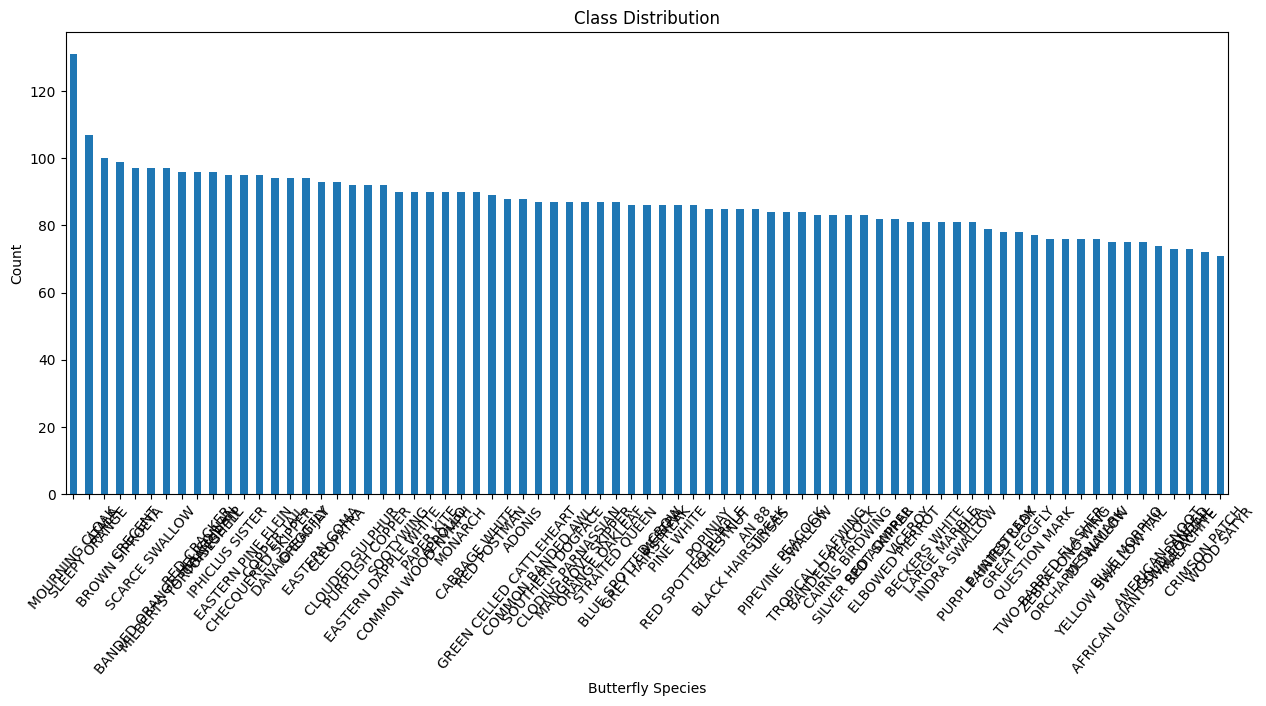

In [5]:
#Step 3: (EDA) Plot class distribution
plt.figure(figsize=(15, 6))
labels_df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Butterfly Species')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

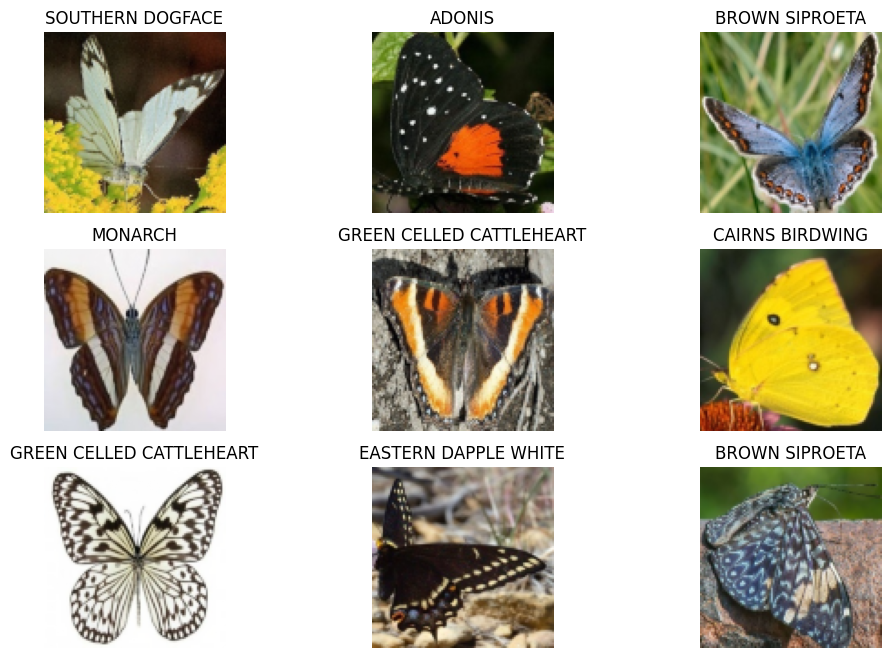

In [6]:
# Plot sample images
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels_df['label'][i])
    plt.axis('off')
plt.show()

In [7]:
# Step 4: Feature Extraction (Flatten the images)
X = images.reshape(images.shape[0], -1)
y = labels

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Model Training
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier with k=5
knn.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 8: Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Define hyperparameter grid
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Step 9: Model Evaluation
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best KNN Accuracy:", accuracy)
print("Best KNN Precision:", precision)
print("Best KNN Recall:", recall)
print("Best KNN F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.06102564102564102
Precision: 0.10378140014586057
Recall: 0.06102564102564102
F1 Score: 0.056473394733759154
Best Parameters: {'n_neighbors': 11}
Best KNN Accuracy: 0.06769230769230769
Best KNN Precision: 0.10487956750363703
Best KNN Recall: 0.06769230769230769
Best KNN F1 Score: 0.06215427531142318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DEEP LEARNING MODEL**

In [8]:
#Step 10:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from skimage import io, transform
import zipfile
from sklearn.metrics import classification_report

In [9]:
# Step 11: Data Preparation
# Load image file and CSV file
image_zip_file = '/content/images.zip'  # ZIP file containing the images
csv_file = '/content/Image_labels.csv'  # CSV file containing image filenames and butterfly species

# Extract images from the ZIP file
with zipfile.ZipFile(image_zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

# Read CSV file
labels_df = pd.read_csv(csv_file)

# Load and preprocess images
image_size = (100, 100)  # Define the desired image size
images = []
for filename in labels_df['filename']:
    img_path = f'/content/images/images/{filename}.jpg'  # Path to the extracted image
    img = io.imread(img_path)
    img_resized = transform.resize(img, image_size)
    images.append(img_resized)
images = np.array(images)

# Convert species labels to numerical labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_df['label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 12: Model Architecture Design
model = Sequential([
    Conv2D(76, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 13: Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 14: Model Training
model.fit(X_train, y_train, epochs=30, batch_size=42, validation_split=0.3)

# Step 15: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_classes = np.argmax(y_test, axis=1)

# Additional: Save the model
model.save('butterfly_cnn_model.h5')


Epoch 1/30
76/76 [==============================] - 15s 93ms/step - loss: 4.3179 - accuracy: 0.0101 - val_loss: 4.3178 - val_accuracy: 0.0117
Epoch 2/30
76/76 [==============================] - 4s 52ms/step - loss: 4.3166 - accuracy: 0.0135 - val_loss: 4.3188 - val_accuracy: 0.0103
Epoch 3/30
76/76 [==============================] - 4s 53ms/step - loss: 4.3146 - accuracy: 0.0148 - val_loss: 4.3201 - val_accuracy: 0.0139
Epoch 4/30
76/76 [==============================] - 4s 52ms/step - loss: 4.3136 - accuracy: 0.0144 - val_loss: 4.3213 - val_accuracy: 0.0227
Epoch 5/30
76/76 [==============================] - 4s 52ms/step - loss: 4.3118 - accuracy: 0.0163 - val_loss: 4.3232 - val_accuracy: 0.0139
Epoch 6/30
76/76 [==============================] - 4s 51ms/step - loss: 4.3113 - accuracy: 0.0151 - val_loss: 4.3241 - val_accuracy: 0.0139
Epoch 7/30
76/76 [==============================] - 4s 53ms/step - loss: 4.3105 - accuracy: 0.0173 - val_loss: 4.3246 - val_accuracy: 0.0227
Epoch 8/30
7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from skimage import io, transform
import zipfile
from sklearn.metrics import classification_report

# Step 10: Load Data and Preprocessing (same as before)

# Load the pretrained model
pretrained_model = load_model('butterfly_cnn_model.h5')

# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add additional layers on top of the pretrained model
new_model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the new model
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the new model
new_model.fit(X_train, y_train, epochs=30, batch_size=42, validation_split=0.3)

# Evaluate the new model
loss, accuracy = new_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict classes for test data
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_classes = np.argmax(y_test, axis=1)

# Additional: Save the new model
new_model.save('improved_butterfly_cnn_model.h5')


Epoch 1/30
76/76 [==============================] - 3s 30ms/step - loss: 4.3180 - accuracy: 0.0126 - val_loss: 4.3184 - val_accuracy: 0.0139
Epoch 2/30
76/76 [==============================] - 2s 22ms/step - loss: 4.3156 - accuracy: 0.0138 - val_loss: 4.3193 - val_accuracy: 0.0227
Epoch 3/30
76/76 [==============================] - 2s 24ms/step - loss: 4.3133 - accuracy: 0.0201 - val_loss: 4.3208 - val_accuracy: 0.0227
Epoch 4/30
76/76 [==============================] - 2s 22ms/step - loss: 4.3128 - accuracy: 0.0163 - val_loss: 4.3223 - val_accuracy: 0.0227
Epoch 5/30
76/76 [==============================] - 2s 26ms/step - loss: 4.3103 - accuracy: 0.0182 - val_loss: 4.3238 - val_accuracy: 0.0227
Epoch 6/30
76/76 [==============================] - 2s 23ms/step - loss: 4.3115 - accuracy: 0.0170 - val_loss: 4.3254 - val_accuracy: 0.0066
Epoch 7/30
76/76 [==============================] - 2s 25ms/step - loss: 4.3100 - accuracy: 0.0141 - val_loss: 4.3262 - val_accuracy: 0.0227
Epoch 8/30
76

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit data generator to training data
datagen.fit(X_train)

# Train the model with augmented data
history = new_model.fit(datagen.flow(X_train, y_train, batch_size=42),
                        epochs=30,
                        validation_data=(X_test, y_test))


Epoch 1/30
109/109 [==============================] - 14s 122ms/step - loss: 4.3153 - accuracy: 0.0174 - val_loss: 4.3213 - val_accuracy: 0.0231
Epoch 2/30
109/109 [==============================] - 13s 119ms/step - loss: 4.3136 - accuracy: 0.0191 - val_loss: 4.3211 - val_accuracy: 0.0231
Epoch 3/30
109/109 [==============================] - 13s 116ms/step - loss: 4.3134 - accuracy: 0.0189 - val_loss: 4.3205 - val_accuracy: 0.0231
Epoch 4/30
109/109 [==============================] - 13s 121ms/step - loss: 4.3131 - accuracy: 0.0189 - val_loss: 4.3207 - val_accuracy: 0.0231
Epoch 5/30
109/109 [==============================] - 13s 123ms/step - loss: 4.3136 - accuracy: 0.0189 - val_loss: 4.3201 - val_accuracy: 0.0231
Epoch 6/30
109/109 [==============================] - 13s 123ms/step - loss: 4.3129 - accuracy: 0.0189 - val_loss: 4.3200 - val_accuracy: 0.0231
Epoch 7/30
109/109 [==============================] - 16s 148ms/step - loss: 4.3129 - accuracy: 0.0189 - val_loss: 4.3203 - val_ac

In [17]:
loss, accuracy = new_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

61/61 [==============================] - 1s 13ms/step - loss: 4.3208 - accuracy: 0.0231
Test Accuracy: 0.023076923564076424


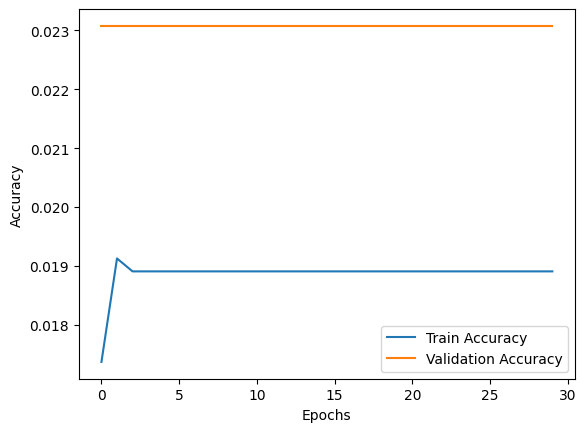

In [18]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
new_model.save('improved_butterfly_cnn_model_v2.h5')

In [20]:
from tensorflow.keras.layers import BatchNormalization

# Define the new model architecture with additional convolutional layers
improved_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the improved model
improved_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the improved model
improved_model.fit(X_train, y_train, epochs=30, batch_size=42, validation_split=0.3)

# Evaluate the improved model
loss, accuracy = improved_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Save the improved model
improved_model.save('improved_butterfly_cnn_model_v3.h5')


Epoch 1/30
76/76 [==============================] - 16s 121ms/step - loss: 4.3185 - accuracy: 0.0157 - val_loss: 4.3181 - val_accuracy: 0.0161
Epoch 2/30
76/76 [==============================] - 6s 75ms/step - loss: 4.3153 - accuracy: 0.0185 - val_loss: 4.3200 - val_accuracy: 0.0227
Epoch 3/30
76/76 [==============================] - 6s 74ms/step - loss: 4.3138 - accuracy: 0.0122 - val_loss: 4.3208 - val_accuracy: 0.0227
Epoch 4/30
76/76 [==============================] - 6s 74ms/step - loss: 4.3126 - accuracy: 0.0173 - val_loss: 4.3219 - val_accuracy: 0.0227
Epoch 5/30
76/76 [==============================] - 6s 73ms/step - loss: 4.3121 - accuracy: 0.0163 - val_loss: 4.3218 - val_accuracy: 0.0227
Epoch 6/30
76/76 [==============================] - 6s 82ms/step - loss: 4.3123 - accuracy: 0.0141 - val_loss: 4.3226 - val_accuracy: 0.0227
Epoch 7/30
76/76 [==============================] - 6s 74ms/step - loss: 4.3118 - accuracy: 0.0166 - val_loss: 4.3229 - val_accuracy: 0.0227
Epoch 8/30
